---
# Create configuration file for working with Salish Sea Model results

---


In [1]:
import sys
import yaml
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

## Define main directory 

In [2]:
# Main dictionary used to output values to SSM_config.yaml
ssm = {}

## Add dictionary with values of model output variable name for given keys of desired variable (e.g. "DO")
i.e. ```ssm['var_name']['DO'] yields 'Var_10'```, which is the SSM variable name for "DO"

In [3]:
variable_name_list=['DO','NH3','NO3','NPP','Temp','Salinity']
parameter_ID_list=['Var_10','Var_14','Var_15','Var_17','Var_18','Var_19']
ssm['var_name'] = {
    variable_name_list[i]: parameter_ID_list[i] \
    for i in range(len(variable_name_list))
}

## Create array of percentages for depth levels
Multiply these values by the total depth of the water column to get the layer thickness for each model level. This layer thickness is used to calculate volume days.
These values were provided by Su Kyong Yun in her script `volume_calculation.py` on 6/9/2022.

In [4]:
ssm['siglev_diff']=numpy.array(
    [ 3.2,  5.7,  7.5,  8.9, 10.1, 11.1, 12.1, 13. , 13.8, 14.6]
).tolist() #b/c savedump dosn't allow for objects

## Define colors used for plotting
See [this cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png) or [this list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for more color options

Run list will include:
1. WWTP
    - a. **Baseline**: all plants on (using output data set for Existing, Ecology (2021))
    - b. **no SOG/NB WWTP source**: All SOG/NB WWTPs plants off (data from Scenario 4, Ecology (2021)
    - c. **BHAM-only**: Shutting off all small WWTP plants (BNR <100) = all except Bellngham
    - e. **no BHAM**: Shutting off only the 1 medium plant (BNR >100) (Bellingham).
2. Rivers
    - a. **no SOB/NB riverine source**: All river inputs from watershed loading to SOG/NB off (data from Scenario 4, Ecology (2021).
    - b. **0.5x riverine** loading for those rivers entering SOG/NB
    - c. **2x  riverine** loading for those rivers entering SOG/NB

darkblue
royalblue
teal
lightseagreen
darkslategrey
purple
mediumpurple
indigo


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


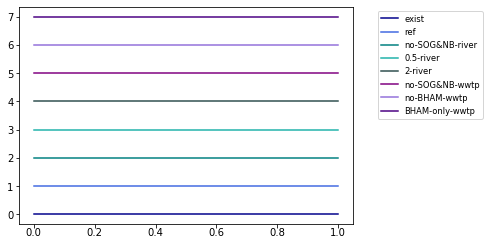

In [5]:
ssm['line_colors']={}
# baselines (blue tones)
ssm['line_colors']['exist'] =  'darkblue'
ssm['line_colors']['ref']   =  'royalblue'
# rivers (green tones)
ssm['line_colors']['no-SOG&NB-river'] = 'teal'
ssm['line_colors']['0.5-river']   = 'lightseagreen'
ssm['line_colors']['2-river']     = 'darkslategrey'
# wwtp (purple tones)
ssm['line_colors']['no-SOG&NB-wwtp']  = 'purple'
ssm['line_colors']['no-BHAM-wwtp']   = 'mediumpurple'
ssm['line_colors']['BHAM-only-wwtp'] = 'indigo'

# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line_colors']):
    print(ssm['line_colors'][case])
    ax.plot(x,idx*numpy.ones(len(x)),color=ssm['line_colors'][case],label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

darkblue
royalblue
darkgoldenrod
sienna
brown
teal
lightseagreen
darkslategrey


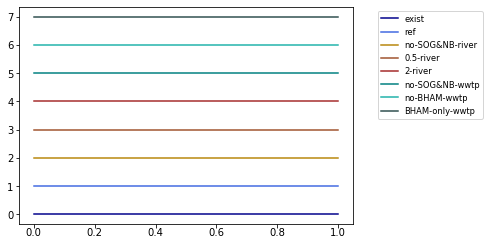

In [6]:
ssm['line_colors']={}
# baselines (blue tones)
ssm['line_colors']['exist'] =  'darkblue'
ssm['line_colors']['ref']   =  'royalblue'
# rivers (green tones)
ssm['line_colors']['no-SOG&NB-river'] = 'darkgoldenrod'
ssm['line_colors']['0.5-river']   = 'sienna'
ssm['line_colors']['2-river']     = 'brown'
# wwtp (purple tones)
ssm['line_colors']['no-SOG&NB-wwtp']  = 'teal'
ssm['line_colors']['no-BHAM-wwtp']   = 'lightseagreen'
ssm['line_colors']['BHAM-only-wwtp'] = 'darkslategrey'

# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line_colors']):
    print(ssm['line_colors'][case])
    ax.plot(x,idx*numpy.ones(len(x)),color=ssm['line_colors'][case],label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

## Define location(s) for model output and graphics files

In [7]:
root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Adi/BS_WQM/'
ssm['output_paths'] = [
    root_output+'2014_SSM4_WQ_exist_orig/hotstart/outputs',
     root_output+'2014_SSM4_WQ_ref_orig/hotstart/outputs',
     root_output+'2014_SSM4_WQ_rvr0.5_reg/hotstart/outputs',
     root_output+'2014_SSM4_WQ_wwtp0.0_reg/hotstart/outputs',
     root_output+'2014_SSM4_WQ_wwtp1.5_reg/hotstart/outputs',
     root_output+'2014_SSM4_WQ_wwtp0.5_reg/hotstart/outputs'
    ] 

# Define directory for saving graphics output
ssm['root_graphics'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/output/daily_min'
)

# Define location and name of Shapefile to use for planar graphics
ssm['shapefile_path'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/KingCounty-Rachael/'\
    'kevin_shapefiles/SSMGrid2_060922/SSMGrid2_060922.shp'
)

## Save specifications to file

In [8]:
with open('SSM_config.yaml', 'w') as file:
    document = yaml.safe_dump(ssm, file)